In [43]:
import numpy as np
import pandas as pd
from utils import go_to_project_root
import data
from matplotlib import pyplot as plt

# go_to_project_root()

In [44]:
f = open("data/interim/misc/trigrams.txt")
tweets = f.readlines()
f.close()
tweets = [tweet.strip() for tweet in tweets]

vectors = pd.read_csv("data/interim/misc/tsne_vectors.csv", index_col=0)
y = data.get_csv().iloc[:,-1].to_numpy()

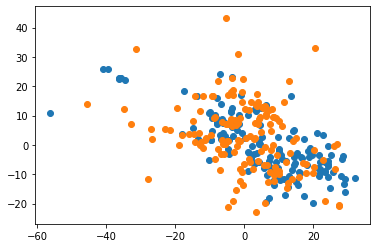

In [45]:
points = np.zeros((300, 2))
for i, tweet in enumerate(tweets):
    vs = []
    for term in tweet.split(" "):
        if term in vectors.index:
            vs += [(vectors.loc[term].x_coord, vectors.loc[term].y_coord)]
    mean_x = np.mean([v[0] for v in vs])
    mean_y = np.mean([v[1] for v in vs])
    points[i] = np.array([mean_x, mean_y])
    
fn = points[np.where(y==1)]
nfn = points[np.where(y==0)]

plt.scatter(fn[:,0], fn[:,1])
plt.scatter(nfn[:,0], nfn[:,1])